# The Dow Jones Industrial Average and Its 30 Components

## Downloading Dow componentms datasets from Quandl

### What is Quandl?
+ Quandl is a platform that provides its users with economic, financial and alternative datasets.
+ Users can download free data, buy paid data or sell data to Quandl.

In [1]:
!pip install quandl 

In [2]:
import quandl #Quandl python module

# The Quandl Python module is free. If you would like to make more than 50 calls a day, 
# however, you will need to create a free Quandl account and set your API key.

QUANDL_API_KEY = 'BCzkk3NDWt7H9yjzx-DY'  # Your own Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY # Setting API key

SYMBOLS = [
    'AAPL','MMM', 'AXP', 'BA', 'CAT',
    'CVX', 'CSCO', 'KO', 'DD', 'XOM',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ',
    'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'UNH', 'UTX', 'TRV', 
    'VZ', 'V', 'WMT', 'WBA', 'DIS',
] # Dow Jones 30 Companies and there ticker symbols which are listed in WIKI Prices

wiki_symbols = ['WIKI/%s'%symbol for symbol in SYMBOLS] #appending ticker symbols after WIKI to form a proper address
df_components = quandl.get(
    wiki_symbols, 
    start_date='2017-01-01', 
    end_date='2017-12-31', 
    column_index=11) #Getting data from Quandl by passing symbols and duration
df_components.columns = SYMBOLS  # Renaming the columns

In [3]:
filled_df_components = df_components.fillna(method='ffill') # used to fill NA/NaN values using the specified method.. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.
daily_df_components = filled_df_components.resample('24h').ffill() # to resample a year by 24hour (a day) and forward fill the NaN.
daily_df_components = daily_df_components.fillna(method='bfill') # to fill NA/NaN values using backard fill method.

In [4]:
daily_df_components

,AAPL,MMM,AXP,BA,CAT,CVX,CSCO,KO,DD,XOM,...,PFE,PG,UNH,UTX,TRV,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,114.715378,174.831943,74.162246,152.668443,91.258087,114.381567,29.484966,40.770394,72.575434,87.567241,...,31.756236,81.645971,159.581286,108.929230,120.549246,53.359309,79.081715,67.291215,81.821163,105.285393
2017-01-04,114.586983,175.097063,75.372857,154.273227,90.850294,114.352450,29.311184,40.624089,73.127563,86.603799,...,32.035306,81.936871,160.035961,108.998029,120.549246,53.300650,79.728295,67.683241,81.840888,106.635206
2017-01-05,115.169696,174.498088,74.443792,154.360760,90.296862,113.857459,29.379349,40.721626,72.772623,85.312787,...,32.343245,82.479884,160.302836,109.440312,120.549246,53.417967,80.663349,67.830251,81.890202,106.575655
2017-01-06,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,...,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670
2017-01-07,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,...,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,175.010000,238.260000,98.740000,295.100000,155.750000,124.980000,38.550000,45.590000,83.930000,83.970000,...,36.140000,92.130000,220.000000,127.230000,134.390000,53.190000,112.690000,98.210000,72.710000,108.670000
2017-12-26,170.570000,238.260000,98.570000,295.360000,156.440000,125.980000,38.480000,45.810000,83.930000,83.980000,...,36.210000,92.480000,219.600000,127.140000,134.780000,53.220000,112.990000,99.160000,73.300000,108.120000
2017-12-27,170.600000,238.260000,99.130000,295.620000,157.520000,125.550000,38.560000,45.930000,83.930000,83.900000,...,36.330000,92.100000,220.420000,127.580000,134.770000,53.280000,114.020000,99.260000,72.860000,107.640000


## Downloading NDAQ Dataset from Alpha Vantage

### What is ALpha Vantage?
+ Alpha Vantage is one of the leading free API market data solutions out there today. 
+ You can get up and running with their API in minutes, and begin to access a wealth of market data that is carefully organized by their team, and made available via simple JSON web APIs.

In [5]:
!pip install alpha-vantage #Installing Python alpha-vantage module 

ERROR: Invalid requirement: '#Installing'


In [6]:
"""
Download the all-time NDAQ dataset
"""
from alpha_vantage.timeseries import TimeSeries

# Update your Alpha Vantage API key here...
ALPHA_VANTAGE_API_KEY = 'PZ2ISG9CYY379KLI'

ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas') #Generate Alpha Vantage time series object
df, meta_data = ts.get_daily_adjusted(symbol='NDAQ', outputsize='full') #Retrieve the data

In [7]:
df.info() # used to print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4781 entries, 2021-06-25 to 2002-07-01
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               4781 non-null   float64
 1   2. high               4781 non-null   float64
 2   3. low                4781 non-null   float64
 3   4. close              4781 non-null   float64
 4   5. adjusted close     4781 non-null   float64
 5   6. volume             4781 non-null   float64
 6   7. dividend amount    4781 non-null   float64
 7   8. split coefficient  4781 non-null   float64
dtypes: float64(8)
memory usage: 336.2 KB


In [8]:
df.tail() # used to show last 5 records

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2002-07-08,14.0,14.0,14.0,14.00,11.879515,300.0,0.0,1.0
2002-07-05,15.0,15.0,15.0,15.00,12.728052,500.0,0.0,1.0
2002-07-03,14.0,16.0,14.0,15.00,12.728052,10200.0,0.0,1.0
2002-07-02,15.5,16.5,15.0,15.13,12.838362,7000.0,0.0,1.0
2002-07-01,15.0,15.0,15.0,15.00,12.728052,1300.0,0.0,1.0


In [9]:
df.index #Rows and columns both have indexes, rows indices are called as index and for columns its general column names.

DatetimeIndex(['2021-06-25', '2021-06-24', '2021-06-23', '2021-06-22',
               '2021-06-21', '2021-06-18', '2021-06-17', '2021-06-16',
               '2021-06-15', '2021-06-14',
               ...
               '2002-07-15', '2002-07-12', '2002-07-11', '2002-07-10',
               '2002-07-09', '2002-07-08', '2002-07-05', '2002-07-03',
               '2002-07-02', '2002-07-01'],
              dtype='datetime64[ns]', name='date', length=4781, freq=None)

In [10]:
import pandas as pd # Used for high level Data Indexing processes

# Prepare the dataframe with only 5th column
df_dji = pd.DataFrame(df['5. adjusted close'])

df_dji.columns = ['NDAQ']
df_dji.index = pd.to_datetime(df_dji.index) # Converting to datetime object

# Trim the new dataframe and resample
djia_2017 = pd.DataFrame(df_dji.loc['2017-01-01':'2017-12-31']) # df.loc Access a group of rows and columns by label(s) or a boolean array.
djia_2017 = djia_2017.resample('24h').ffill()

# Applying a Kernel Principal Component Analysis

## Finding Eigenvectors and Eigenvalues

In [11]:
from sklearn.decomposition import KernelPCA # KernelPCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. 

fn_z_score = lambda x: (x - x.mean()) / x.std() #Transforming using z-score

df_z_components = daily_df_components.apply(fn_z_score) # passing function to apply and storing returned series in new
fitted_pca = KernelPCA().fit(df_z_components) # Non-linear dimensionality reduction through the use of kernels

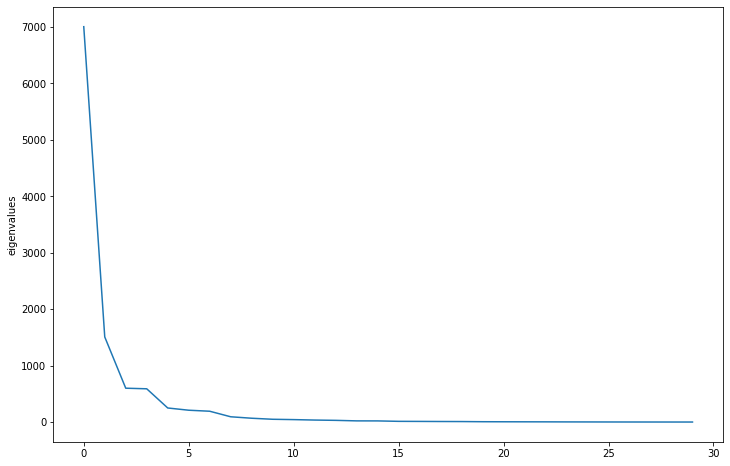

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt # Machine Learning library to create plots and data visualizations

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fitted_pca.lambdas_)
plt.ylabel('eigenvalues')
plt.show();

In [13]:
fn_weighted_avg = lambda x: x / x.sum() # Anonymous Function to find weighted average
weighted_values = fn_weighted_avg(fitted_pca.lambdas_)[:5] # Passing first 5 values

In [14]:
print(weighted_values)

[0.64863002 0.13966718 0.05558246 0.05461861 0.02313883]


In [15]:
weighted_values.sum() #addition of weighted average of first 5 values 

0.9216371041932275

## Reconstructing the Dow Index with PCA

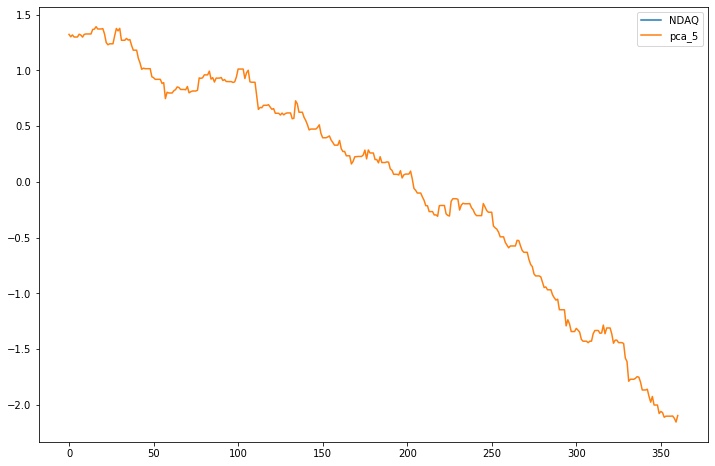

In [16]:
import numpy as np #Numpy provides fast mathematical function processing

# By default, the KernelPCA is instantiated with the n_components=None parameter, which constructs a kernel PCA with non-zero components.
# We can also create a PCA index with five components.

kernel_pca = KernelPCA(n_components=5).fit(df_z_components)
pca_5 = kernel_pca.transform(-daily_df_components)

weights = fn_weighted_avg(kernel_pca.lambdas_)
reconstructed_values = np.dot(pca_5, weights)

# Combine DJIA and PCA index for comparison
df_combined = djia_2017.copy()
df_combined['pca_5'] = reconstructed_values
df_combined = df_combined.apply(fn_z_score)
df_combined.plot(figsize=(12, 8));

# Analyzing a time series with trend

In [17]:
import quandl #Quandl python module

QUANDL_API_KEY = 'BCzkk3NDWt7H9yjzx-DY'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY # Setting API key

df = quandl.get(
    'CHRIS/CME_GC1', 
    column_index=6,
    collapse='monthly',
    start_date='2000-01-01') #Getting data from Quandl by passing symbols and duration

In [18]:
df.head() # head() is used to get fisrt 5 rows of dataframe

,Settle
Date,
2000-01-31,283.2
2000-02-29,294.2
2000-03-31,278.4
2000-04-30,274.7
2000-05-31,271.7


In [19]:
df_settle = df['Settle'].resample('MS').ffill().dropna()

# Pandas dataframe.rolling() function provides the feature of rolling window calculations. 
# The concept of rolling window calculation is most primarily used in signal processing and time series data. 
# In a very simple words we take a window size of k at a time and perform some desired mathematical operation on it. 
# A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.

df_rolling = df_settle.rolling(12)
df_mean = df_rolling.mean()
df_std = df_rolling.std()

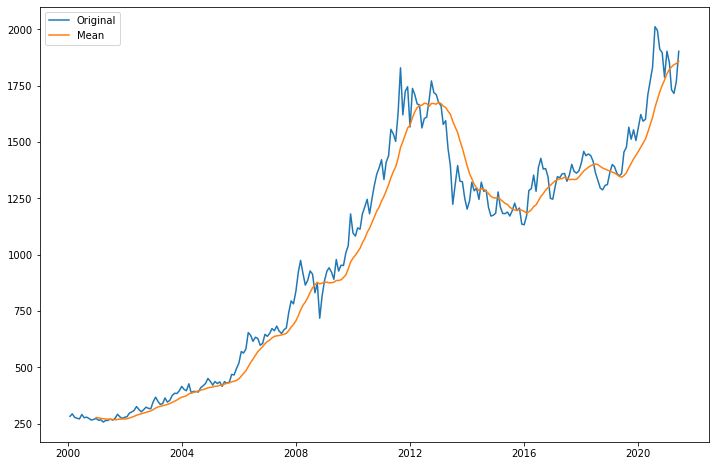

In [20]:
# Plotting a line graph
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend();

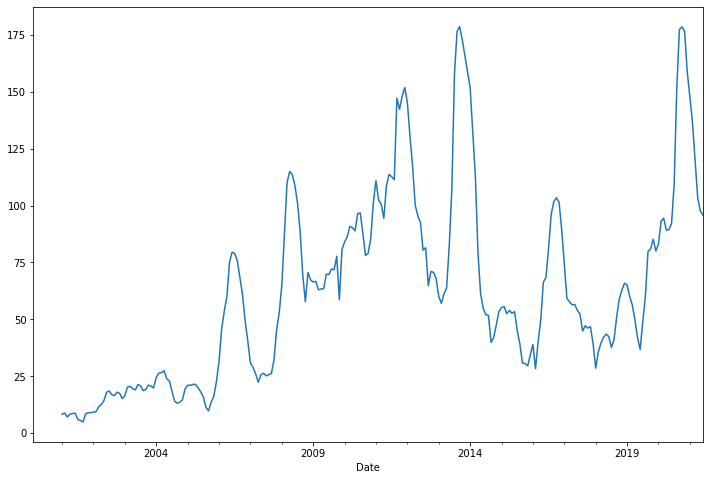

In [21]:
df_std.plot(figsize=(12, 8));

### The Augmented Dickey-Fuller Test

+ An Augmented Dickey-Fuller Test (ADF) is a type of statistical test that determines whether a unit root is present in time series data. Unit roots can cause unpredictable results in time series analysis. A null hypothesis is formed on the unit root test to determine how strongly time series data is affected by a trend. By accepting the null hypothesis, we accept the evidence that the time series data is non-stationary. By rejecting the null hypothesis, or accepting the alternative hypothesis, we accept the evidence that the time series data is generated by a stationary process. This process is also known as trend-stationary. Values of the ADF test statistic are negative. Lower values of ADF indicates stronger.

+ Although software will run the test, it’s usually up to you to interpret the results. In general, a p-value of less than 5% means you can reject the null hypothesis that there is a unit root. You can also compare the calculated DFT statistic with a tabulated critical value. If the DFT statistic is more negative than the table value, reject the null hypothesis of a unit root. Note: The more negative the DF test statistic, the stronger the evidence for rejecting the null hypothesis of a unit root.

In [22]:
# statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 
from statsmodels.tsa.stattools import adfuller
# Adfuller is the Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

result = adfuller(df_settle)
print('ADF statistic: ',  result[0])
print('p-value:', result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -0.6727450369450448
p-value: 0.8536834573174017
Critical value (1%): -3.457
Critical value (5%): -2.873
Critical value (10%): -2.573


# Making a time series stationary

A non-stationary time series data is likely to be affected by a trend or seasonality. Trending time series data has a mean that is not constant over time. Data that is affected by seasonality have variations at specific intervals in time. In making a time series data stationary, the trend and seasonality effects have to be removed. Detrending, differencing, and decomposition are such methods. The resulting stationary data is then suitable for statistical forecasting. Let's look at all three methods in detail.

## Detrending

In [23]:
import numpy as np #Numpy provides fast mathematical function processing

df_log = np.log(df_settle) # transformation step that normalizes large values into smaller ones.

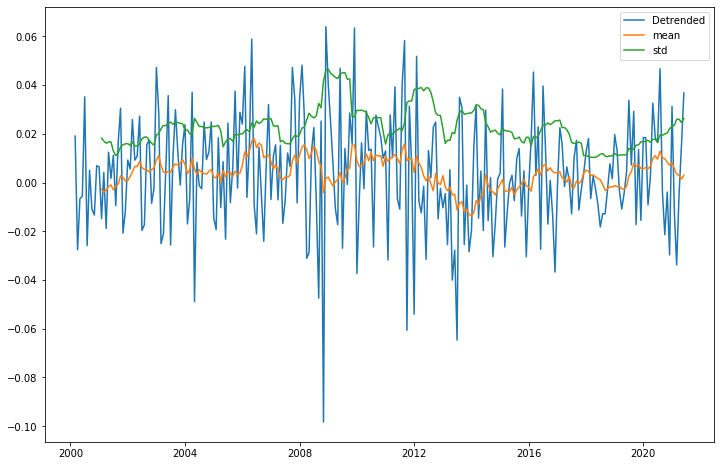

In [24]:
df_log_ma= df_log.rolling(2).mean() # moving average
df_detrend = df_log - df_log_ma # subtract the transformation from the moving average.
df_detrend.dropna(inplace=True)

# Mean and standard deviation of detrended data
df_detrend_rolling = df_detrend.rolling(12)
df_detrend_ma = df_detrend_rolling.mean()
df_detrend_std = df_detrend_rolling.std()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_detrend, label='Detrended')
plt.plot(df_detrend_ma, label='mean')
plt.plot(df_detrend_std, label='std')
plt.legend(loc='upper right');

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_detrend)
print('ADF statistic: ', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items(): #Traversing to get critical values
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -17.83616011271862
p-value: 0.00000
Critical value (1%): -3.456
Critical value (5%): -2.873
Critical value (10%): -2.573


## Removing trend by differencing
Differencing involves the difference of time series values with a time lag. The first-order difference of the time series is given by the following formula:

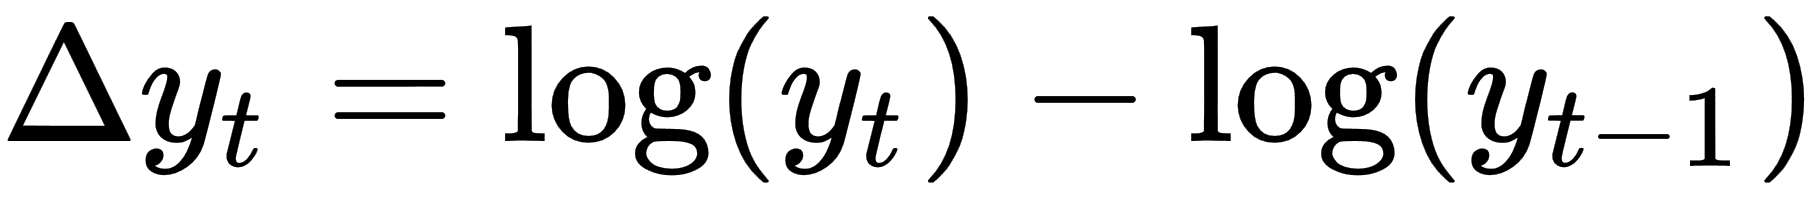

We can reuse the df_log variable in the previous cell as our logarithmic transformed time series, and utilize the diff() and shift() methods of NumPy modules in our differencing.

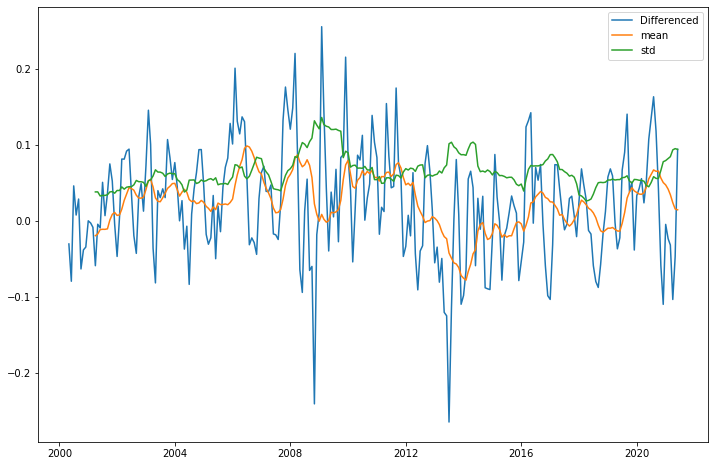

In [26]:
df_log_diff = df_log.diff(periods=3).dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='mean')
plt.plot(df_diff_std, label='std')
plt.legend(loc='upper right');

In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_log_diff)

print('ADF statistic:', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items(): #Traversing to get critical values
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -3.4008135526634535
p-value: 0.01093
Critical value (1%): -3.458
Critical value (5%): -2.874
Critical value (10%): -2.573


## Seasonal Decomposing
Decomposing involves modeling both the trend and seasonality, and then removing them. We can use the statsmodel.tsa.seasonal module to model a non-stationary time series dataset using moving averages and remove its trend and seasonal components.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition using moving averages

decompose_result = seasonal_decompose(df_log.dropna(), period=12)

# The result object provides access to the trend and seasonal series as arrays. 
# It also provides access to the residuals, which are the time series after the trend, and seasonal components are removed. 
# Finally, the original or observed data is also stored.

df_trend = decompose_result.trend
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

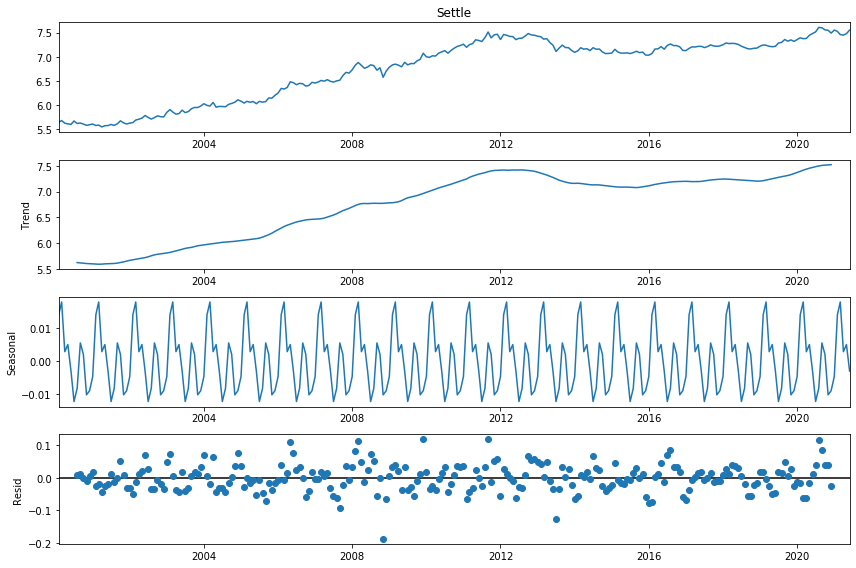

In [29]:
#plotting
plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

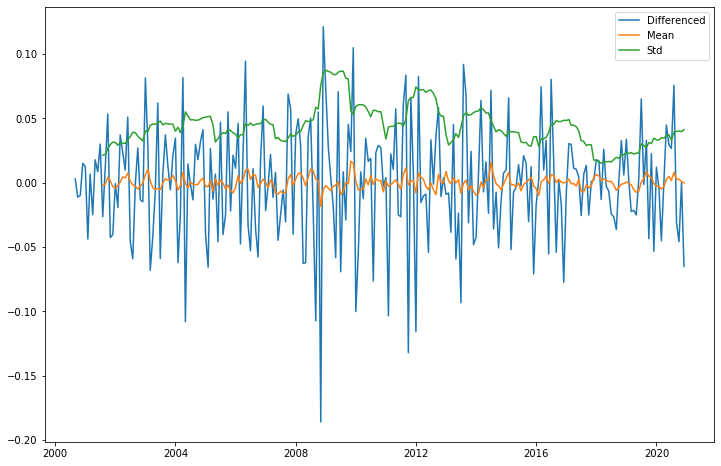

In [30]:
df_log_diff = df_residual.diff().dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='Mean')
plt.plot(df_diff_std, label='Std')
plt.legend();

In [31]:
result = adfuller(df_residual.dropna())

print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items(): #Traversing to get critical values
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -6.851743406274037
p-value: 0.00000
Critical value (1%): -3.459
Critical value (5%): -2.874
Critical value (10%): -2.573


# Forecasting and Predicting a Time Series

With stationary data, we can proceed to perform statistical modeling such as prediction and forecasting. Prediction involves generating best estimates of in-sample data. Forecasting involves generating best estimates of out-of-sample data. Predicting future values is based on previously observed values.

## Finding model parameters by grid search
A grid search, also known as the hyperparameter optimization method, can be used to iteratively explore different combinations of parameters for fitting our ARIMA model. We can fit a seasonal ARIMA model with the SARIMAX() function of the statsmodels module in each iteration, returning an object of the MLEResults class. The MLEResults object holds an aic attribute for returning the AIC value. The model with the lowest AIC value gives us the best-fitting model that determines our parameters of p, d, and q.

In [32]:
import itertools # Python’s Itertool is a module that provides various functions that work on iterators to produce complex iterators. 
import warnings 
from statsmodels.tsa.statespace.sarimax import SARIMAX #Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models.

# settings
warnings.filterwarnings("ignore")

def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    #In plain words, AIC is a single number score that can be used to determine 
    #which of multiple models is most likely to be the best model for a given dataset. 
    #It estimates models relatively, meaning that AIC scores are only useful in comparison 
    #with other AIC scores for the same dataset. A lower AIC score is better.
    
    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0 # track total number of iterations
    for order in param_combinations:    
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(df_settle, order=order, 
                    seasonal_order=seasonal_order, 
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                ) # Instantiating
                model_result = model.fit(maxiter=200, disp=False) # Fitting the model

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic #rewriting the lowest_aic variable to get lowest aic value to select the best model
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs 

In [33]:
lowest_aic, order, seasonal_order = arima_grid_search(df_settle, 12) #calling the function to get the lowest aic score,order and seasonal order

In [34]:
#formatting the ouput
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA(0, 1, 1)x(0, 1, 1, 12)
Lowest AIC: 2536.884


## Fitting the SARIMAX model

In [35]:
model = SARIMAX(
    df_settle,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False) #fit method for fitting the SARIMAX model

In [36]:
print(model_results.summary()) # Having obtained the optimal model parameters, inspect the model properties using the summary() method on the fitted results to view detailed statistical information

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  257
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1265.442
Date:                            Mon, 28 Jun 2021   AIC                           2536.884
Time:                                    15:33:22   BIC                           2547.198
Sample:                                02-01-2000   HQIC                          2541.044
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1214      0.045     -2.678      0.007      -0.210      -0.033
ma.S.L12      -0.8938      0.071   

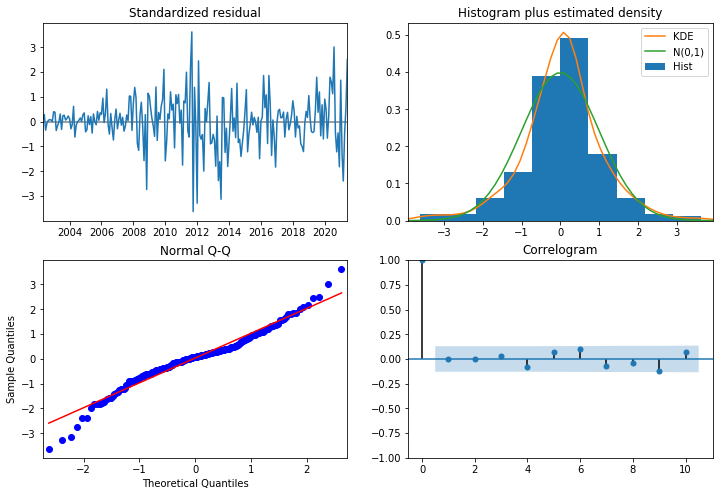

In [37]:
#plotting
model_results.plot_diagnostics(figsize=(12, 8));

In [38]:
# model statistics
model_results.resid.describe()

count    257.000000
mean       2.369478
std       59.426570
min     -211.568963
25%      -23.152163
50%        4.758631
75%       24.942651
max      283.200000
dtype: float64

## Predicting the model

In [39]:
n = len(df_settle.index)
prediction = model_results.get_prediction(
    start=n-12*5, 
    end=n+5
) # In-sample prediction and out-of-sample forecasting
prediction_ci = prediction.conf_int() #Construct confidence interval for the fitted parameters

In [40]:
print(prediction_ci.head(3)) # Print first 3 rows

            lower Settle  upper Settle
2016-07-01   1165.386740   1392.692723
2016-08-01   1273.667301   1500.973284
2016-09-01   1345.139626   1572.445610


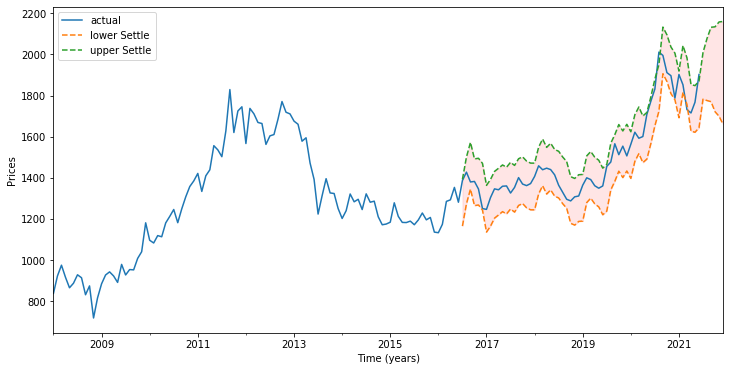

In [41]:
#Plotting
plt.figure(figsize=(12, 6))

ax = df_settle['2008':].plot(label='actual')
prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend()
plt.show()